In [ ]:
#!/usr/bin/env python
import sys
import os
import pickle as pkl
import warnings
import time
import glob

from functools import wraps, partial
from pathlib import Path
from multiprocessing import cpu_count
from multiprocessing.pool import Pool as Pool

import numpy as np
import matplotlib.pyplot as plt


from AnalyseCID import AnalyseCID
from utils import *
from utils_plot import *

sys.path.append('data\\config')
sys.path.append('ComputableInformationDensity_dev')
notebook_path = Path().resolve()
parent_dir = notebook_path.parent
sys.path.append(str(parent_dir))

from data.config.dicts import DATA_CONFIGS, FIG_FOLDER_CONFIGS

from ComputableInformationDensity_dev.cid import interlaced_time, cid2d
from ComputableInformationDensity_dev.computable_information_density import cid, cid_shuffle
from ComputableInformationDensity_dev.hilbert_curve import hilbert_curve, itter_hscan

from NematicAnalysis.utils import gen_clustering_metadata, get_defect_arr_from_frame, calc_weighted_mean, calc_acf_for_arr, \
    calc_autocorr, rdf2d_mod

plt.style.use('sg_article')
plt.rcParams.update({"text.usetex": True,})
#plt.rcParams['legend.handlelength'] = 0

In [ ]:
base_path = f'Z:\\cid\\na'
save_path = f'data\\na'

save_figs = True
verbose = True

ordering='z' # 'h' for hilbert, 'z' for z-order
data_suffix = 'na512'  # 'sd', 'ndg', 's', 'f' or ''    
use_seq = False
seq_prefix = '_seq' if use_seq else ''
ordering_suffix = 'zorder' if ordering=='z' else ''

nbits = 8
window_size=32
nframes = 8
cg = 4

if ordering == 'h':
    output_suffix = f'_seq_nb{nbits}cg{cg}' if use_seq else f'_nb{nbits}cg{cg}'
elif ordering == 'z':
    output_suffix = f'_nx{window_size}nt{nframes}cg{cg}'

data_dict = DATA_CONFIGS #[data_suffix]
fig_folder = FIG_FOLDER_CONFIGS[data_suffix]

cid_dict = {
    'base_path': base_path,
    'save_path': save_path,
    'output_suffix': output_suffix,
    'nbits': nbits,
    'cg': cg,
    'verbose': verbose,
    'ddof': 1,   
    **data_dict[data_suffix]
}

#output_suffix = data_dict[data_suffix]['output_suffix']
figs_save_path = f'data\\figs\\{fig_folder}\\{output_suffix[1:]}'
if not os.path.exists(figs_save_path): 
    os.makedirs(figs_save_path)


ac = AnalyseCID(cid_dict,)
# Set figure save path
ac.figs_save_path = figs_save_path


* temporal corr
* corr func (version kris, version other)

In [26]:
ac.cid_params['compression_factor']

KeyError: 'compression_factor'

In [32]:

LX=ac.L_list[0]
actidx=5
expidx=0
compression_factor = ac.cid_params[LX]['compression_factor']
cid_vals=ac.cid[LX][:,:,actidx,expidx,0].reshape(-1, compression_factor, compression_factor)
cid_vals.shape

(50, 16, 16)

In [36]:
# Set correlation parameters
abs_val = True # when True, the degeneracy in the director is resolved
auto_corr_kwargs = {'shift': 2/np.pi if abs_val is True else 9/(7*np.pi),
                    'abs_val': abs_val, 
                    'normalize': True}
auto_corr_kwargs = {'shift': 0,
                    'abs_val': abs_val, 
                    'normalize': True}

origin=True
step=1

rdf, _ = rdf2d_mod(cid_vals[0], corr_func_kwargs = auto_corr_kwargs, \
                                 origin=origin, step=step)

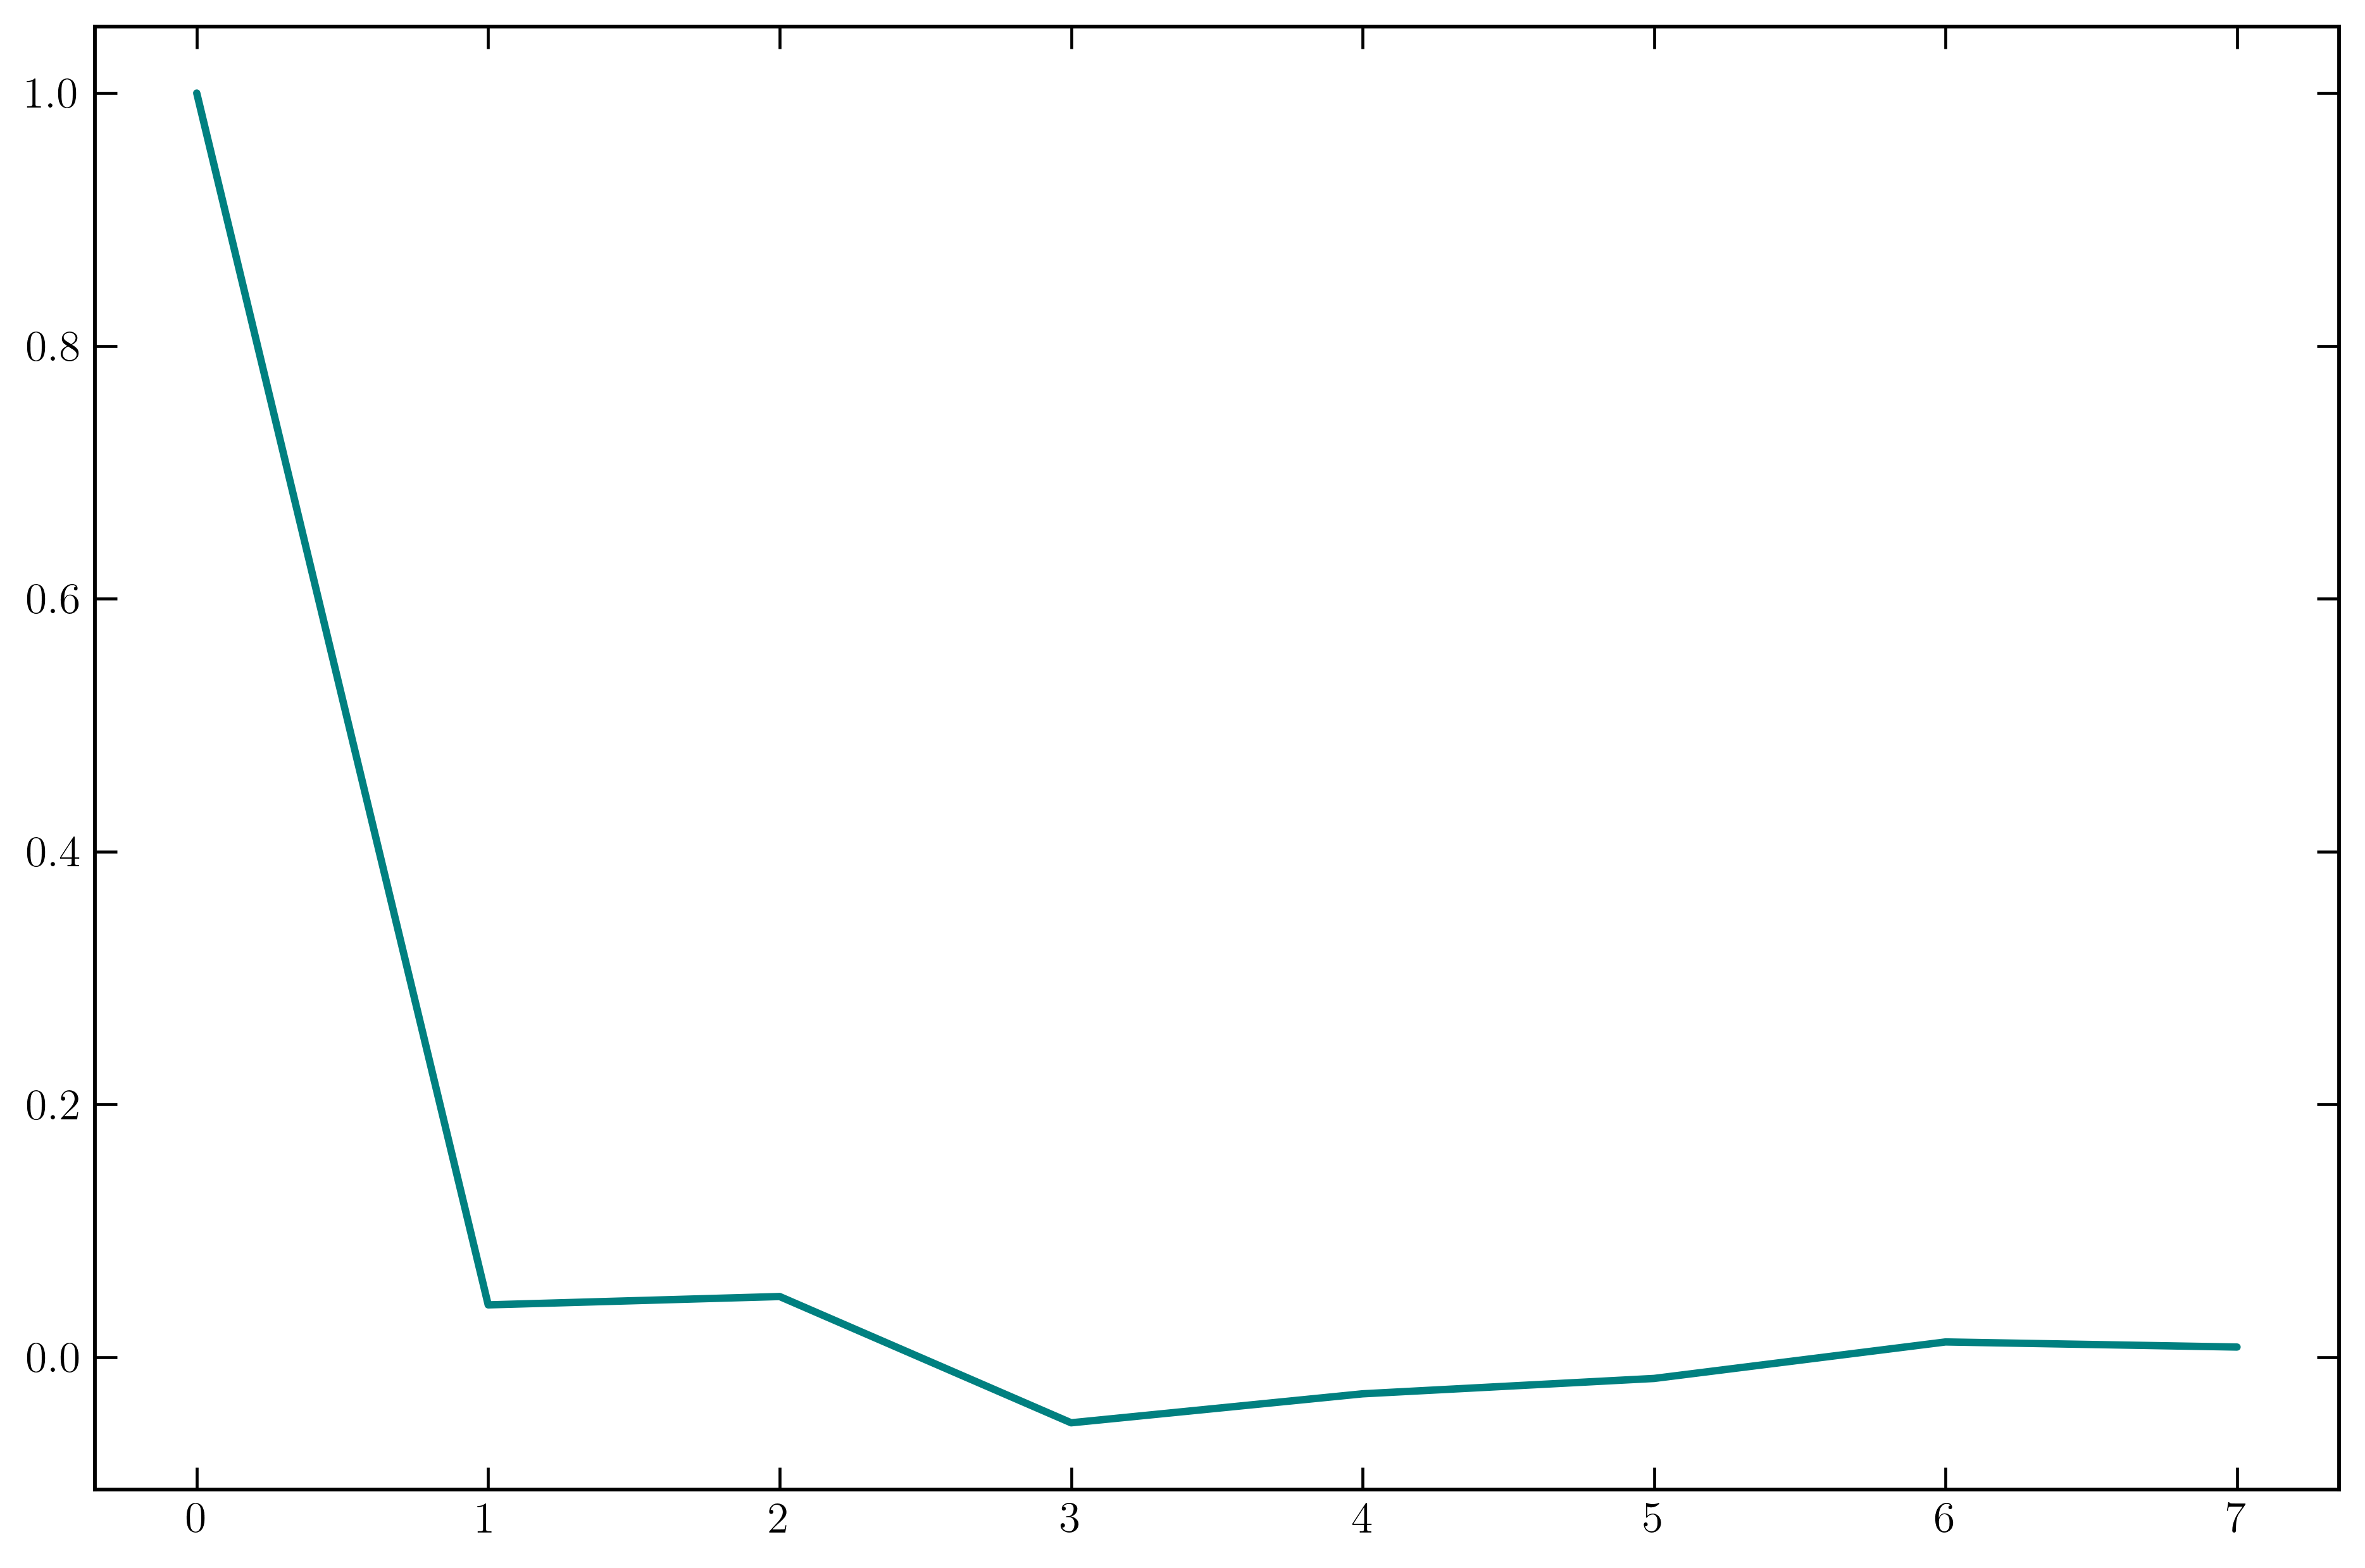

In [37]:
plt.plot(rdf)